# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Define empty list for holding the latitude and longitude combinations
lat_lngs = []

# Define empty list for holding the city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data using for and enumerate functions
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Define endpoint URL with each city
    city_url = (f'{url}appid={weather_api_key}&q={city}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))    

    # Add 1 to the record count
    record_count += 1 

    # Run an API request for each of the cities using try and except function
    response = requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | rolim de moura
City not found. Skipping...
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | kursavka
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | itarema
Processing Record 9 of Set 1 | asau
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | altamira
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | aklavik
Processing Record 15 of Set 1 | kolosovka
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | bontang
Processing Record 22 of 

Processing Record 36 of Set 4 | sola
Processing Record 37 of Set 4 | luderitz
Processing Record 38 of Set 4 | delitzsch
Processing Record 39 of Set 4 | nizwa
Processing Record 40 of Set 4 | jumla
Processing Record 41 of Set 4 | kampot
Processing Record 42 of Set 4 | rawson
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | eston
Processing Record 45 of Set 4 | sabang
Processing Record 46 of Set 4 | morondava
Processing Record 47 of Set 4 | sekoma
Processing Record 48 of Set 4 | muros
Processing Record 49 of Set 4 | vardo
Processing Record 0 of Set 5 | kudahuvadhoo
Processing Record 1 of Set 5 | richards bay
Processing Record 2 of Set 5 | kaitangata
Processing Record 3 of Set 5 | golcuk
City not found. Skipping...
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | gorom-gorom
Processing Record 6 of Set 5 | pribyslav
Processing Record 7 of Set 5 | guantanamo
Processing Record 8 of Set 5 | samusu
City not found. Skipping...
Processing Record 9 of 

Processing Record 25 of Set 8 | casambalangan
Processing Record 26 of Set 8 | calvinia
Processing Record 27 of Set 8 | nemuro
Processing Record 28 of Set 8 | satitoa
City not found. Skipping...
Processing Record 29 of Set 8 | georgetown
Processing Record 30 of Set 8 | izvor
Processing Record 31 of Set 8 | fallon
Processing Record 32 of Set 8 | tsabong
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | phan thiet
Processing Record 35 of Set 8 | logan lake
Processing Record 36 of Set 8 | ojinaga
Processing Record 37 of Set 8 | tunduru
City not found. Skipping...
Processing Record 38 of Set 8 | tonj
Processing Record 39 of Set 8 | wamba
Processing Record 40 of Set 8 | muscat
Processing Record 41 of Set 8 | maimon
City not found. Skipping...
Processing Record 42 of Set 8 | bakuriani
Processing Record 43 of Set 8 | khawhai
Processing Record 44 of Set 8 | mareeba
Processing Record 45 of Set 8 | siguiri
Processing Record 46 of Set 8 | kyzyl-suu
Processing Record 47 of Se

Processing Record 12 of Set 12 | guicheng
City not found. Skipping...
Processing Record 13 of Set 12 | kokopo
Processing Record 14 of Set 12 | qui nhon
Processing Record 15 of Set 12 | chino
Processing Record 16 of Set 12 | ladario
Processing Record 17 of Set 12 | coquimbo
Processing Record 18 of Set 12 | mnogovershinnyy
Processing Record 19 of Set 12 | agadez
Processing Record 20 of Set 12 | sesheke
Processing Record 21 of Set 12 | lavrentiya
Processing Record 22 of Set 12 | madiun
Processing Record 23 of Set 12 | sainte-maxime
Processing Record 24 of Set 12 | bergen
Processing Record 25 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 26 of Set 12 | tornio
Processing Record 27 of Set 12 | guerrero negro
Processing Record 28 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 29 of Set 12 | udachnyy
Processing Record 30 of Set 12 | puro
Processing Record 31 of Set 12 | yatou
Processing Record 32 of Set 12 | suleja
Processing Record 33

In [5]:
# Convert the cities weather data into a Pandas DataFrame and convert temperature from Kelvin to Celsius 
city_data_df = pd.DataFrame(city_data)
city_data_df['Max Temp'] = city_data_df['Max Temp']-273.15

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,27.09,83,75,4.63,TO,1679264507
1,hithadhoo,-0.6000,73.0833,27.28,74,100,1.96,MV,1679264508
2,nikolskoye,59.7035,30.7861,2.94,99,100,1.94,RU,1679264509
3,kursavka,44.4564,42.5093,9.82,79,100,3.77,RU,1679264509
4,barrow,71.2906,-156.7887,-18.99,78,40,4.12,US,1679264510


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\arzan\OneDrive\Desktop\cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\arzan\OneDrive\Desktop\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,27.09,83,75,4.63,TO,1679264507
1,hithadhoo,-0.6000,73.0833,27.28,74,100,1.96,MV,1679264508
2,nikolskoye,59.7035,30.7861,2.94,99,100,1.94,RU,1679264509
3,kursavka,44.4564,42.5093,9.82,79,100,3.77,RU,1679264509
4,barrow,71.2906,-156.7887,-18.99,78,40,4.12,US,1679264510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

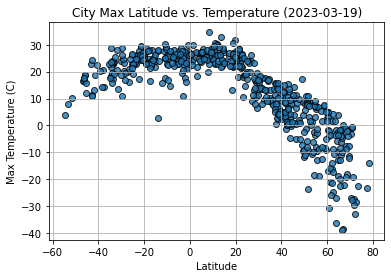

In [12]:
# Build scatter plot for latitude vs. temperature

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Max Latitude vs. Temperature ({date})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Show plot
plt.show()


#### Latitude Vs. Humidity

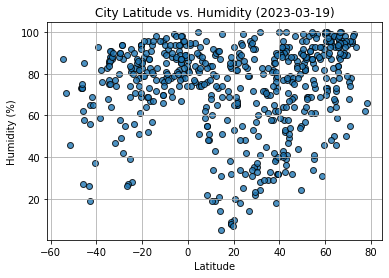

In [13]:
# Build scatter plot for latitude vs. humidity

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

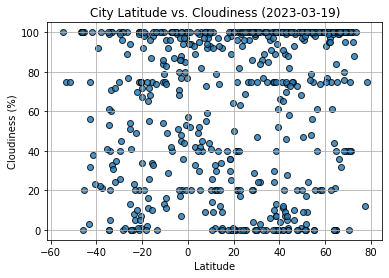

In [14]:
# Build the scatter plots for latitude vs. cloudiness

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

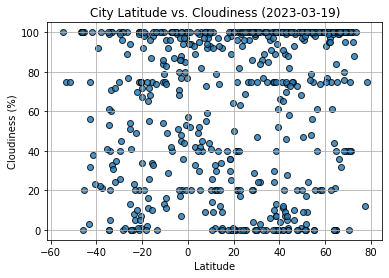

In [15]:
# Build the scatter plots for latitude vs. cloudiness

# Convert date to y/m/d format and define variable
date = pd.to_datetime(city_data_df['Date'], unit='s').apply(lambda t: t.strftime('%Y-%m-%d'))[0]

# Create plot
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],c="tab:blue", edgecolors="black",alpha=0.8)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linreg(x, y):
    '''determines linear regression between x and y'''
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x['Lat'],y)
    regress_values = x['Lat'] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create plot and incorporate linear regression, xlabel, and printing of r squared value into function
    plt.scatter(x['Lat'],y,c="tab:blue")
    plt.plot(x['Lat'],regress_values,"r-")       
    plt.annotate(line_eq,(0.15,0.15),xycoords='figure fraction',fontsize=15,color="red",annotation_clip=False)
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue**2}")
    return

In [17]:
# Create a DataFrame with only the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nikolskoye,59.7035,30.7861,2.94,99,100,1.94,RU,1679264509
3,kursavka,44.4564,42.5093,9.82,79,100,3.77,RU,1679264509
4,barrow,71.2906,-156.7887,-18.99,78,40,4.12,US,1679264510
7,asau,46.4333,26.4000,0.51,69,5,1.57,RO,1679264512
8,victoria,22.2855,114.1577,21.22,90,82,5.36,HK,1679263939


In [18]:
# Create a DataFrame with only the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,27.09,83,75,4.63,TO,1679264507
1,hithadhoo,-0.6000,73.0833,27.28,74,100,1.96,MV,1679264508
5,ushuaia,-54.8000,-68.3000,3.81,87,100,7.72,AR,1679264259
6,itarema,-2.9248,-39.9167,24.75,87,88,4.36,BR,1679264511
9,altamira,-3.2033,-52.2064,24.21,67,7,0.86,BR,1679264513


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7740821562754726


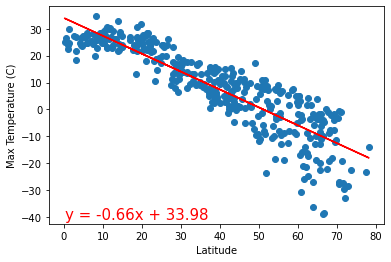

In [19]:
# Max Temp vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")

# Show plot
plt.show()

The r-value is: 0.23841420038272862


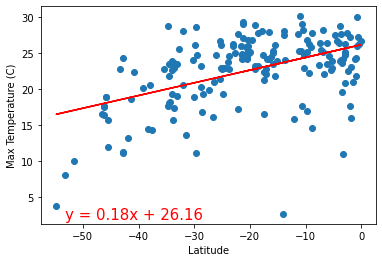

In [21]:
# Max Temp vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Heavy correlation between temperature and the location of the cities from 0. The further the city from 0 (equator) the colder it is. The Northern Hemisphere shows a negative correlation while the Southern Hemisphere illustrates a positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07052565228354504


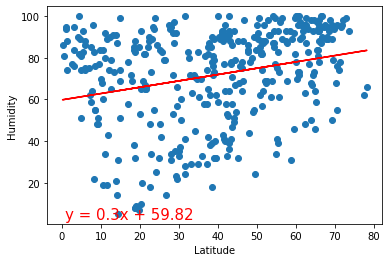

In [22]:
# Humidity vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel("Humidity")

# Show plot
plt.show()

The r-value is: 0.15933846682774594


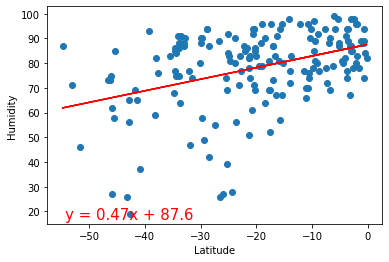

In [23]:
# Humidity vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Humidity'])

# Incorporate the other graph properties
plt.ylabel("Humidity")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
R-Squared values indicate there is little to no correlation between a city's latitude and the humidity of that city in both the hemispheres. Overall trend is that you will mostly see less humidity score cities close to the northern hemisphere and more humidity score cities towards to the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03501817548821108


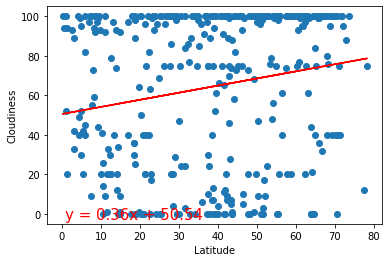

In [24]:
# Cloudiness vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel("Cloudiness")

# Show plot
plt.show()

The r-value is: 0.01292130870964895


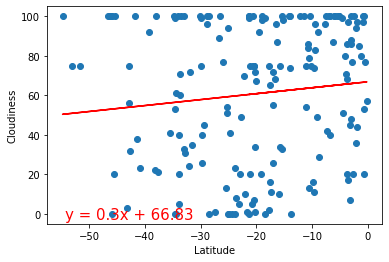

In [25]:
# Cloudiness vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel("Cloudiness")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Both the graphs show overall positive correlation

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018742245560704217


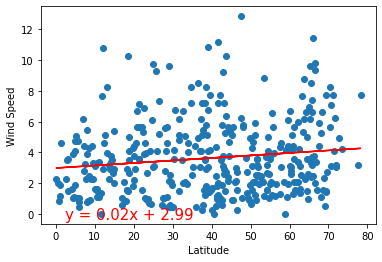

In [26]:
# Wind Speed vs Latitude linear regression on Northern Hemisphere
linreg(northern_hemi_df, northern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel("Wind Speed")

# Show plot
plt.show()

The r-value is: 0.1743224881941554


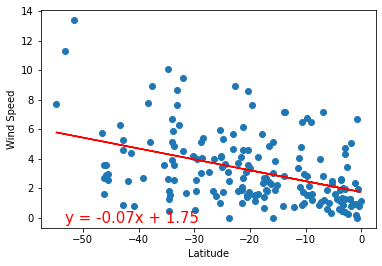

In [27]:
# Wind Speed vs Latitude linear regression on Southern Hemisphere
linreg(southern_hemi_df, southern_hemi_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel("Wind Speed")

# Show plot
plt.show()

**Discussion about the linear relationship:** The realtionship between the cities latitude and wind speed are almost opposite between the two hemispheres. The Southern Hemisphere shows a negative correaltion while Northern shows a postive 
